In [1]:
import yfinance as yf
import pandas as pd

# 要抓取的股票清單（對應書中的 ['usBIDU', 'usGOOG', 'usFB', 'usAAPL', 'us.IXIC']）
tickers = ["BIDU", "GOOG", "META", "AAPL", "^IXIC"]

# 下載多支股票的歷史資料（近 2 年）
data = yf.download(tickers, start="2023-01-01", end="2025-11-01")

# 只取收盤價欄位
close_df = data["Close"]

# 移除有缺值的行
close_df = close_df.dropna()

# 顯示尾部資料（相當於書中表6-2）
print(close_df.tail())

# 若你要跟 ABuSymbolPd 結構一致（panel → swapaxes）可以這樣：
# 在 yfinance 中其實已經是 DataFrame，不需要再 swapaxes
# 但如果你想模擬原書結構：
my_stock_df_close = close_df

# 顯示結果
print("\n收盤價 DataFrame：")
display(my_stock_df_close.tail())


/var/folders/k0/mjnvdkdj7sn_zbtz76h68xr40000gn/T/ipykernel_42256/2280639612.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2023-01-01", end="2025-11-01")
[*********************100%***********************]  5 of 5 completed

Ticker            AAPL        BIDU        GOOG        META         ^IXIC
Date                                                                    
2025-10-27  268.549652  128.660004  269.929993  750.820007  23637.460938
2025-10-28  268.739471  126.820000  268.429993  751.440002  23827.490234
2025-10-29  269.438812  127.599998  275.170013  751.669983  23958.470703
2025-10-30  271.137146  121.809998  281.899994  666.469971  23581.140625
2025-10-31  270.108154  120.870003  281.820007  648.349976  23724.960938

收盤價 DataFrame：


Ticker,AAPL,BIDU,GOOG,META,^IXIC
Date,,,,,
2025-10-27,268.549652,128.660004,269.929993,750.820007,23637.460938
2025-10-28,268.739471,126.820000,268.429993,751.440002,23827.490234
2025-10-29,269.438812,127.599998,275.170013,751.669983,23958.470703
2025-10-30,271.137146,121.809998,281.899994,666.469971,23581.140625
2025-10-31,270.108154,120.870003,281.820007,648.349976,23724.960938


In [2]:
# 定義 Z-score 標準化函數
def regular_std(df):
    """Z-score 標準化（零均值正規化）"""
    return (df - df.mean()) / df.std()

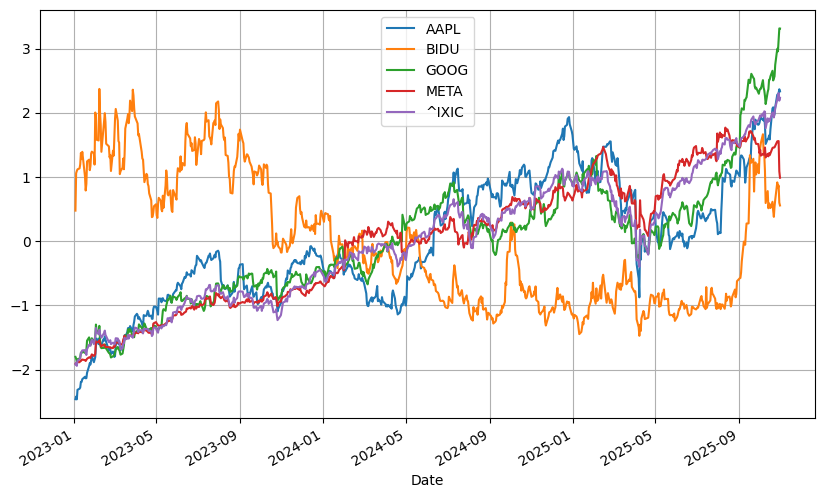

In [7]:
import matplotlib.pyplot as plt

# 對每支股票做標準化
my_stock_df_close_std = regular_std(my_stock_df_close)

# 繪圖
plt.figure(figsize=(10, 6))
my_stock_df_close_std.plot(ax=plt.gca())
plt.legend(my_stock_df_close.columns)
plt.grid(True)
plt.show()

In [17]:
import numpy as np
from numpy import linalg

# 範例：建立矩陣
cs_matrix = my_stock_df_close.to_numpy()
print(cs_matrix[:5])

# 範例：單位矩陣
unit_matrix = np.eye(5)
print(unit_matrix)

# 假設 cs_matrix 是 5x5 的可逆矩陣
cs_matrix = np.random.rand(5, 5)
print("cs_matrix：")
print(cs_matrix)

# 求反矩陣
cs_matrix_inv = linalg.inv(cs_matrix)
print("逆矩陣 cs_matrix_inv：")
print(cs_matrix_inv)

# 建立單位矩陣（對角線為1，其餘為0）
eye5 = np.eye(5)

# 驗證反矩陣：A × A⁻¹ ≈ I（單位矩陣）
is_identity = np.allclose(np.dot(cs_matrix, cs_matrix_inv), eye5)
print(f"相乘後結果是單位矩陣：{is_identity}")


[[  123.21121216   119.12999725    89.0903244    123.97572327
  10386.98046875]
 [  124.48203278   131.75999451    88.10706329   126.58960724
  10458.75976562]
 [  123.16194916   132.52999878    86.18023682   126.1622467
  10305.24023438]
 [  127.69359589   133.05999756    87.56079102   129.22337341
  10569.29003906]
 [  128.2157135    133.38999939    88.19644928   128.67674255
  10635.65039062]]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
cs_matrix：
[[0.01512139 0.81743792 0.62474562 0.6057534  0.47493109]
 [0.86202617 0.96778831 0.29800611 0.29715719 0.86697543]
 [0.01772538 0.80203563 0.46553588 0.56353134 0.9156912 ]
 [0.21448232 0.95961049 0.31618005 0.6862177  0.95551111]
 [0.96167594 0.62297831 0.93921878 0.78404645 0.89551225]]
逆矩陣 cs_matrix_inv：
[[-0.21654831  0.4689622  -1.45626585  0.59264915  0.51755159]
 [ 1.57206345  1.09008388 -0.7901738  -0.11116697 -0.96248967]
 [ 0.91968844  0.30287169  2.07402938 -3.0540909   0.35697601]